In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [40]:
df = pd.read_csv("1515_PCA.csv")

In [ ]:
# print(df)

In [41]:
MNXM_list = df.pop("MNXM")
BiGG_list = df.pop("BiGG")

In [42]:
features = df.columns.values.tolist()

In [43]:
x = df.loc[:, features].values

print(x)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.12500000e-01  1.11200000e+00]
 [ 1.00000000e+00  1.23826928e+01 -5.62108200e+00 ...  1.10000000e+01
  -3.46613000e+00  1.38160100e+02]
 [ 2.00000000e+00  1.09033694e+01 -5.60886556e+00 ...  8.00000000e+00
   1.00940000e+00  6.46720000e+01]
 ...
 [ 9.60000000e+02  8.72048611e+00 -5.62500000e+00 ...  0.00000000e+00
  -3.43460000e+00  8.65930000e+00]
 [ 9.61000000e+02  1.33136950e+01 -2.74503366e+00 ...  2.00000000e+00
   8.35570000e-01  1.10702000e+02]
 [ 9.62000000e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -8.24700000e-01  3.61380000e+00]]


In [44]:
y  = df.loc[:, features].values

print(y)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.12500000e-01  1.11200000e+00]
 [ 1.00000000e+00  1.23826928e+01 -5.62108200e+00 ...  1.10000000e+01
  -3.46613000e+00  1.38160100e+02]
 [ 2.00000000e+00  1.09033694e+01 -5.60886556e+00 ...  8.00000000e+00
   1.00940000e+00  6.46720000e+01]
 ...
 [ 9.60000000e+02  8.72048611e+00 -5.62500000e+00 ...  0.00000000e+00
  -3.43460000e+00  8.65930000e+00]
 [ 9.61000000e+02  1.33136950e+01 -2.74503366e+00 ...  2.00000000e+00
   8.35570000e-01  1.10702000e+02]
 [ 9.62000000e+02  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  -8.24700000e-01  3.61380000e+00]]


In [45]:
x = StandardScaler().fit_transform(x)

In [46]:
pca = PCA(n_components = 5)

principalComponents = pca.fit_transform(x)

In [47]:
PCA_df = pd.DataFrame(data = principalComponents, 
columns =["PC1","PC2", "PC3", "PC4", "PC5"])


PCA_df.head(5)

,PC1,PC2,PC3,PC4,PC5
0,-7.503142,17.707280,33.676256,11.116791,-1.816882
1,2.419660,-0.872484,-0.324879,2.204348,0.837227
2,-1.714172,-1.758112,-0.030081,1.003441,-0.388800
3,-4.501674,0.663141,0.218606,-1.136513,0.236215
4,-2.752569,-0.323752,-0.024521,0.106978,0.382383


In [48]:
PCA_df.insert(0, "BiGG", BiGG_list)
PCA_df.insert(1, "MNXM", MNXM_list)

dfName = pd.read_csv("Calc.csv")
PCA_df.insert(2, "Name", dfName["Name"])

In [49]:
PCA_df.head(5)

,BiGG,MNXM,Name,PC1,PC2,PC3,PC4,PC5
0,h,MNXM1,H(+),-7.503142,17.707280,33.676256,11.116791,-1.816882
1,nadh,MNXM10,NADH,2.419660,-0.872484,-0.324879,2.204348,0.837227
2,grdp,MNXM100,(2E)-geranyl diphosphate,-1.714172,-1.758112,-0.030081,1.003441,-0.388800
3,btal,MNXM1017,butanal,-4.501674,0.663141,0.218606,-1.136513,0.236215
4,dtbt,MNXM1020,"(4R,5S)-dethiobiotin",-2.752569,-0.323752,-0.024521,0.106978,0.382383


In [25]:
PCA_df.to_csv("PCA_test.csv")

In [26]:
dfName = pd.read_csv("Calc.csv")

In [27]:
PCA_df.insert(2, "Name", dfName["Name"])

In [54]:
PCA_df.to_csv("PCA_test.csv")

In [ ]:
viz = plt.figure (figsize=(8,8))

ax = viz.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1", fontsize=15)
ax.set_ylabel("Principal Component 2", fontsize=15)
ax.set_title("This is a title lol", fontsize=20)



for target, color in zip(targets, colors):
    indicesToKeep = concatDf["target"] == target
    ax.scatter( concatDf.loc[indicesToKeep, 'Principal Component 1']
    , concatDf.loc[indicesToKeep, 'Principal Component 2']
    , c = color
    , s = 50)
ax.legend(Legend)
ax.grid()


In [35]:
print("Explained variation per principal component: {}".format(pca.explained_variance_))

Explained variation per principal component: [32.32522654  7.53406798  2.96827088  2.49544974  2.18333436]


(-5.0, 15.0)

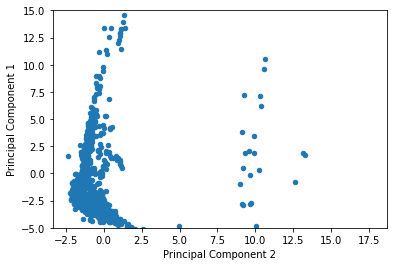

In [37]:
ax  = PCA_df.plot.scatter(x = "Principal Component 2", y ="Principal Component 1")
ax.set_ylim(-5, 15)

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import plotly
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")

ax.plot_trisurf(PCA_df.PC1, PCA_df.PC2, 
    PCA_df.PC3, 
    PCA_df.PC4, 
    PCA_df.PC5,cmap=cm.jet, linewidth=0.2,antialiased = True)
plt.show()

C:\Users\meide\.conda\envs\rdkit\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1008x648 with 1 Axes>